In [4]:
# Install course package in editable mode
%pip install ../../introdl -q

    torch (>=1.9.*)
           ~~~~~~^
Note: you may need to restart the kernel to use updated packages.


In [2]:
from introdl.visul import activations_widget

activations_widget()

interactive(children=(SelectMultiple(description='Activations', index=(0,), options=('sigmoid', 'ReLU', 'tanh'…

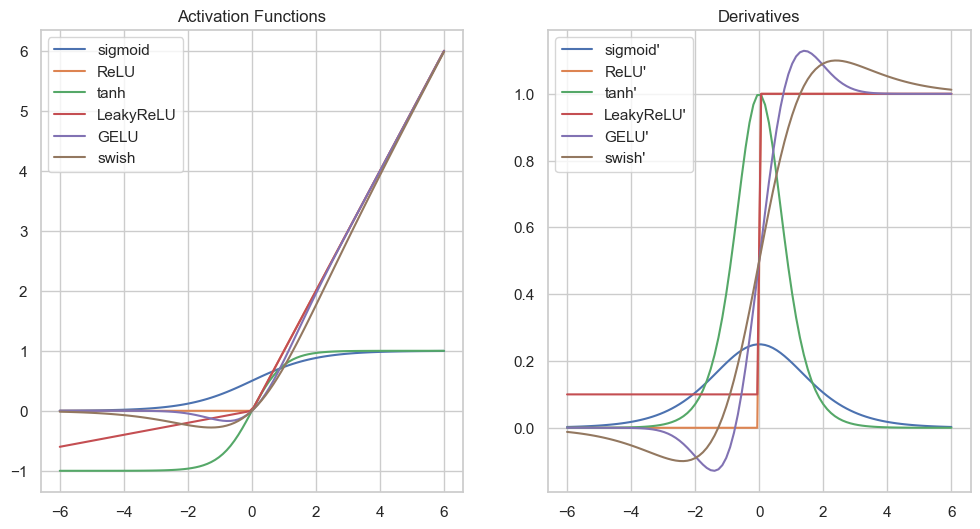

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import erf  # Import erf from scipy.special

def plot_activation_functions(activation_functions):
    x = np.linspace(-6, 6, 100)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    sns.set(style="whitegrid")

    for activation in activation_functions:
        if activation == "sigmoid":
            y = 1 / (1 + np.exp(-x))
            dy = y * (1 - y)
        elif activation == "ReLU":
            y = np.maximum(0, x)
            dy = np.where(x > 0, 1, 0)
        elif activation == "tanh":
            y = np.tanh(x)
            dy = 1 - np.tanh(x) ** 2
        elif activation == "LeakyReLU":
            y = np.where(x > 0, x, 0.1 * x)
            dy = np.where(x > 0, 1, 0.1 * np.ones_like(x))
        elif activation == "GELU":
            y = x * 0.5 * (1 + erf(x / np.sqrt(2)))  # Use scipy's erf
            dy = 0.5 * (1 + erf(x / np.sqrt(2))) + (x * np.exp(-0.5 * x ** 2)) / np.sqrt(2 * np.pi)
        elif activation == "swish":
            y = x / (1 + np.exp(-x))
            dy = (1 + np.exp(-x) + x * np.exp(-x)) / (1 + np.exp(-x)) ** 2
        else:
            raise ValueError(f"Unknown activation function: {activation}")

        axes[0].plot(x, y, label=activation)
        axes[1].plot(x, dy, label=f"{activation}'")

    axes[0].set_title("Activation Functions")
    axes[0].legend()
    axes[1].set_title("Derivatives")
    axes[1].legend()

    plt.show()

plot_activation_functions(["sigmoid", "ReLU", "tanh", "LeakyReLU", "GELU", "swish"])


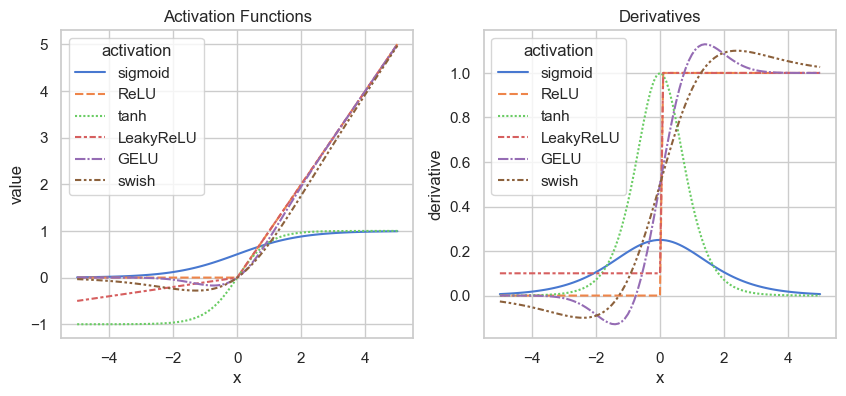

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import erf

def plot_activation_functions(activation_functions):
    x = np.linspace(-5, 5, 101)
    data = {
        "x": [],
        "value": [],
        "derivative": [],
        "activation": [],
    }

    # Compute values and derivatives for each activation function
    for activation in activation_functions:
        if activation == "sigmoid":
            y = 1 / (1 + np.exp(-x))
            dy = y * (1 - y)
        elif activation == "ReLU":
            y = np.maximum(0, x)
            dy = np.where(x > 0, 1, 0)
        elif activation == "tanh":
            y = np.tanh(x)
            dy = 1 - np.tanh(x) ** 2
        elif activation == "LeakyReLU":
            y = np.where(x > 0, x, 0.1 * x)
            dy = np.where(x > 0, 1, 0.1 * np.ones_like(x))
        elif activation == "GELU":
            y = x * 0.5 * (1 + erf(x / np.sqrt(2)))
            dy = 0.5 * (1 + erf(x / np.sqrt(2))) + (x * np.exp(-0.5 * x ** 2)) / np.sqrt(2 * np.pi)
        elif activation == "swish":
            y = x / (1 + np.exp(-x))
            dy = (1 + np.exp(-x) + x * np.exp(-x)) / (1 + np.exp(-x)) ** 2
        else:
            raise ValueError(f"Unknown activation function: {activation}")
        
        # Append data for plotting
        data["x"].extend(x)
        data["value"].extend(y)
        data["derivative"].extend(dy)
        data["activation"].extend([activation] * len(x))

    # Create DataFrame from the collected data
    df = pd.DataFrame(data)

    # Set up the plotting style and layout
    sns.set(style="whitegrid", palette="muted")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))  # 4:3 aspect ratio for each subplot

    # Plot activation functions
    sns.lineplot(
        data=df, 
        x="x", 
        y="value", 
        hue="activation", 
        style="activation", 
        ax=axes[0]
    )
    axes[0].set_title("Activation Functions")

    # Plot derivatives of activation functions
    sns.lineplot(
        data=df, 
        x="x", 
        y="derivative", 
        hue="activation", 
        style="activation", 
        ax=axes[1]
    )
    axes[1].set_title("Derivatives")

    plt.show()

plot_activation_functions(["sigmoid", "ReLU", "tanh", "LeakyReLU", "GELU", "swish"])


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import erf
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# Define the activation functions
activation_functions = {
    "sigmoid": lambda x: (1 / (1 + np.exp(-x)), lambda y: y * (1 - y)),
    "ReLU": lambda x: (np.maximum(0, x), lambda y: np.where(x > 0, 1, 0)),
    "tanh": lambda x: (np.tanh(x), lambda y: 1 - y ** 2),
    "LeakyReLU": lambda x: (np.where(x > 0, x, 0.1 * x), lambda y: np.where(x > 0, 1, 0.1 * np.ones_like(x))),
    "GELU": lambda x: (x * 0.5 * (1 + erf(x / np.sqrt(2))), lambda y: 0.5 * (1 + erf(x / np.sqrt(2))) + (x * np.exp(-0.5 * x ** 2)) / np.sqrt(2 * np.pi)),
    "swish": lambda x: (x / (1 + np.exp(-x)), lambda y: (1 + np.exp(-x) + x * np.exp(-x)) / (1 + np.exp(-x)) ** 2),
}

# Define the function to plot selected activation functions
def plot_activation_functions(selected_activations):
    x = np.linspace(-6, 6, 100)
    data = {
        "x": [],
        "value": [],
        "derivative": [],
        "activation": [],
    }

    for activation in selected_activations:
        func = activation_functions[activation]
        y, dy_func = func(x)
        dy = dy_func(y)
        
        # Append data for plotting
        data["x"].extend(x)
        data["value"].extend(y)
        data["derivative"].extend(dy)
        data["activation"].extend([activation] * len(x))

    # Create DataFrame from the collected data
    df = pd.DataFrame(data)

    # Set up the plotting style and layout
    sns.set(style="whitegrid", palette="muted")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))  # Adjusted aspect ratio

    # Plot activation functions
    sns.lineplot(
        data=df, 
        x="x", 
        y="value", 
        hue="activation", 
        style="activation", 
        ax=axes[0]
    )
    axes[0].set_title("Activation Functions")
    axes[0].legend(title='Activation')

    # Plot derivatives of activation functions
    sns.lineplot(
        data=df, 
        x="x", 
        y="derivative", 
        hue="activation", 
        style="activation", 
        ax=axes[1]
    )
    axes[1].set_title("Derivatives")
    axes[1].legend(title="Activation'")

    plt.show()

# Create a widget for selecting activation functions
activation_selector = widgets.SelectMultiple(
    options=list(activation_functions.keys()),
    value=["sigmoid"],  # Default value
    description="Activations",
    disabled=False
)

# Use the interactive function to connect the selector widget to the plot function
interactive_plot = interactive(plot_activation_functions, selected_activations=activation_selector)
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot


interactive(children=(SelectMultiple(description='Activations', index=(0,), options=('sigmoid', 'ReLU', 'tanh'…

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import erf
import ipywidgets as widgets
from ipywidgets import interactive

def activations_widget():
    # Define the activation functions
    activation_functions = {
        "sigmoid": lambda x: (1 / (1 + np.exp(-x)), lambda y: y * (1 - y)),
        "ReLU": lambda x: (np.maximum(0, x), lambda y: np.where(x > 0, 1, 0)),
        "tanh": lambda x: (np.tanh(x), lambda y: 1 - y ** 2),
        "LeakyReLU": lambda x: (np.where(x > 0, x, 0.1 * x), lambda y: np.where(x > 0, 1, 0.1 * np.ones_like(x))),
        "GELU": lambda x: (x * 0.5 * (1 + erf(x / np.sqrt(2))), lambda y: 0.5 * (1 + erf(x / np.sqrt(2))) + (x * np.exp(-0.5 * x ** 2)) / np.sqrt(2 * np.pi)),
        "swish": lambda x: (x / (1 + np.exp(-x)), lambda y: (1 + np.exp(-x) + x * np.exp(-x)) / (1 + np.exp(-x)) ** 2),
    }

    # Define the function to plot selected activation functions
    def plot_activation_functions(selected_activations):
        x = np.linspace(-6, 6, 100)
        data = {
            "x": [],
            "value": [],
            "derivative": [],
            "activation": [],
        }

        for activation in selected_activations:
            func = activation_functions[activation]
            y, dy_func = func(x)
            dy = dy_func(y)

            # Append data for plotting
            data["x"].extend(x)
            data["value"].extend(y)
            data["derivative"].extend(dy)
            data["activation"].extend([activation] * len(x))

        # Create DataFrame from the collected data
        df = pd.DataFrame(data)

        # Set up the plotting style and layout
        sns.set(style="whitegrid", palette="muted")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))  # Adjusted aspect ratio

        # Plot activation functions
        sns.lineplot(
            data=df, 
            x="x", 
            y="value", 
            hue="activation", 
            style="activation", 
            ax=axes[0]
        )
        axes[0].set_title("Activation Functions")
        axes[0].legend(title='Activation')

        # Plot derivatives of activation functions
        sns.lineplot(
            data=df, 
            x="x", 
            y="derivative", 
            hue="activation", 
            style="activation", 
            ax=axes[1]
        )
        axes[1].set_title("Derivatives")
        axes[1].legend(title="Activation'")

        plt.show()

    # Create a widget for selecting activation functions
    activation_selector = widgets.SelectMultiple(
        options=list(activation_functions.keys()),
        value=["sigmoid"],  # Default value
        description="Activations",
        disabled=False
    )

    # Use the interactive function to connect the selector widget to the plot function
    interactive_plot = interactive(plot_activation_functions, selected_activations=activation_selector)
    output = interactive_plot.children[-1]
    output.layout.height = '500px'
    display(interactive_plot)

activations_widget()


interactive(children=(SelectMultiple(description='Activations', index=(0,), options=('sigmoid', 'ReLU', 'tanh'…